<a href="https://www.kaggle.com/code/joyshil0599/price-of-gold-in-every-year?scriptVersionId=125044484" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-gold-price-2018-2023/Daily Gold Price - Sheet1.csv


In [2]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt 

# > **Upload the dataset**

In [3]:
df = pd.read_csv('/kaggle/input/daily-gold-price-2018-2023/Daily Gold Price - Sheet1.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Mar 29, 2023","1,966.10","1,966.10","1,966.10","1,966.10","1,966.10",21
1,"Mar 28, 2023","1,972.40","1,972.40","1,972.40","1,972.40","1,972.40",21
2,"Mar 27, 2023","1,957.20","1,957.20","1,952.40","1,952.40","1,952.40",877
3,"Mar 24, 2023","1,991.70","1,995.40","1,982.10","1,982.10","1,982.10",19
4,"Mar 23, 2023","1,990.50","1,994.60","1,990.50","1,993.80","1,993.80",33
...,...,...,...,...,...,...,...
1261,"Apr 06, 2018","1,326.50","1,333.00","1,319.00","1,331.90","1,331.90",348
1262,"Apr 05, 2018","1,333.50","1,333.70","1,322.60","1,324.30","1,324.30",258
1263,"Apr 04, 2018","1,331.80","1,347.30","1,331.60","1,335.80","1,335.80",718
1264,"Apr 03, 2018","1,340.40","1,341.50","1,328.50","1,332.80","1,332.80",702


In [5]:
df=df.drop(['Open','High','Low','Adj Close','Volume'],axis=1)
df

,Date,Close
0,"Mar 29, 2023","1,966.10"
1,"Mar 28, 2023","1,972.40"
2,"Mar 27, 2023","1,952.40"
3,"Mar 24, 2023","1,982.10"
4,"Mar 23, 2023","1,993.80"
...,...,...
1261,"Apr 06, 2018","1,331.90"
1262,"Apr 05, 2018","1,324.30"
1263,"Apr 04, 2018","1,335.80"
1264,"Apr 03, 2018","1,332.80"


In [6]:
df.rename(columns={'Close': 'Price of gold in 2023 year'}, inplace=True)#rename the colse column name into price of gold in 2019
df

,Date,Price of gold in 2023 year
0,"Mar 29, 2023","1,966.10"
1,"Mar 28, 2023","1,972.40"
2,"Mar 27, 2023","1,952.40"
3,"Mar 24, 2023","1,982.10"
4,"Mar 23, 2023","1,993.80"
...,...,...
1261,"Apr 06, 2018","1,331.90"
1262,"Apr 05, 2018","1,324.30"
1263,"Apr 04, 2018","1,335.80"
1264,"Apr 03, 2018","1,332.80"


In [7]:
df = df[~df['Date'].str.contains('2018')]

In [8]:
df

,Date,Price of gold in 2023 year
0,"Mar 29, 2023","1,966.10"
1,"Mar 28, 2023","1,972.40"
2,"Mar 27, 2023","1,952.40"
3,"Mar 24, 2023","1,982.10"
4,"Mar 23, 2023","1,993.80"
...,...,...
1071,"Jan 08, 2019","1,283.20"
1072,"Jan 07, 2019","1,286.80"
1073,"Jan 04, 2019","1,282.70"
1074,"Jan 03, 2019","1,291.80"


In [9]:
df = df[~df['Date'].str.contains('2022|2021|2020|2019|2018')]#drop other year value like 2018 2019

In [10]:
df

,Date,Price of gold in 2023 year
0,"Mar 29, 2023","1,966.10"
1,"Mar 28, 2023","1,972.40"
2,"Mar 27, 2023","1,952.40"
3,"Mar 24, 2023","1,982.10"
4,"Mar 23, 2023","1,993.80"
...,...,...
57,"Jan 06, 2023","1,864.20"
58,"Jan 05, 2023","1,834.80"
59,"Jan 04, 2023","1,852.80"
60,"Jan 03, 2023","1,839.70"


In [11]:
import calendar
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%b').str.lower()#convet date in only month formate 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df

,Date,Price of gold in 2023 year
0,mar,"1,966.10"
1,mar,"1,972.40"
2,mar,"1,952.40"
3,mar,"1,982.10"
4,mar,"1,993.80"
...,...,...
57,jan,"1,864.20"
58,jan,"1,834.80"
59,jan,"1,852.80"
60,jan,"1,839.70"


In [13]:
df = df.sort_index(ascending=False)#sorting by index

In [14]:
df

,Date,Price of gold in 2023 year
61,jan,-
60,jan,"1,839.70"
59,jan,"1,852.80"
58,jan,"1,834.80"
57,jan,"1,864.20"
...,...,...
4,mar,"1,993.80"
3,mar,"1,982.10"
2,mar,"1,952.40"
1,mar,"1,972.40"


In [15]:
df = df.reset_index(drop=True)

In [16]:
df

,Date,Price of gold in 2023 year
0,jan,-
1,jan,"1,839.70"
2,jan,"1,852.80"
3,jan,"1,834.80"
4,jan,"1,864.20"
...,...,...
57,mar,"1,993.80"
58,mar,"1,982.10"
59,mar,"1,952.40"
60,mar,"1,972.40"


In [17]:
# Convert "Price of gold in 2023 year" column to numeric
df['Price of gold in 2023 year'] = pd.to_numeric(df['Price of gold in 2023 year'].str.replace(',', '').replace('-', '0'))
# Group by "Date" column and sum the "Price of gold in 2023 year" column
df = df.groupby('Date').sum().reset_index()

In [18]:
df

,Date,Price of gold in 2023 year
0,feb,35211.5
1,jan,39909.1
2,mar,40048.8


In [19]:
df.rename(columns={'Date': 'Year'}, inplace=True)

In [20]:
df

,Year,Price of gold in 2023 year
0,feb,35211.5
1,jan,39909.1
2,mar,40048.8


# > **sorting by month like jan,feb,mar**

In [21]:
sorting_order = {'jan': 1, 'feb': 2, 'mar': 3}
df['Year'] = df['Year'].map(sorting_order)
df.sort_values('Year', inplace=True)
df.reset_index(drop=True, inplace=True)
month_names = {v: k for k, v in sorting_order.items()}
df['Year'] = df['Year'].map(month_names)

In [22]:
df

,Year,Price of gold in 2023 year
0,jan,39909.1
1,feb,35211.5
2,mar,40048.8


# > **create line chart**

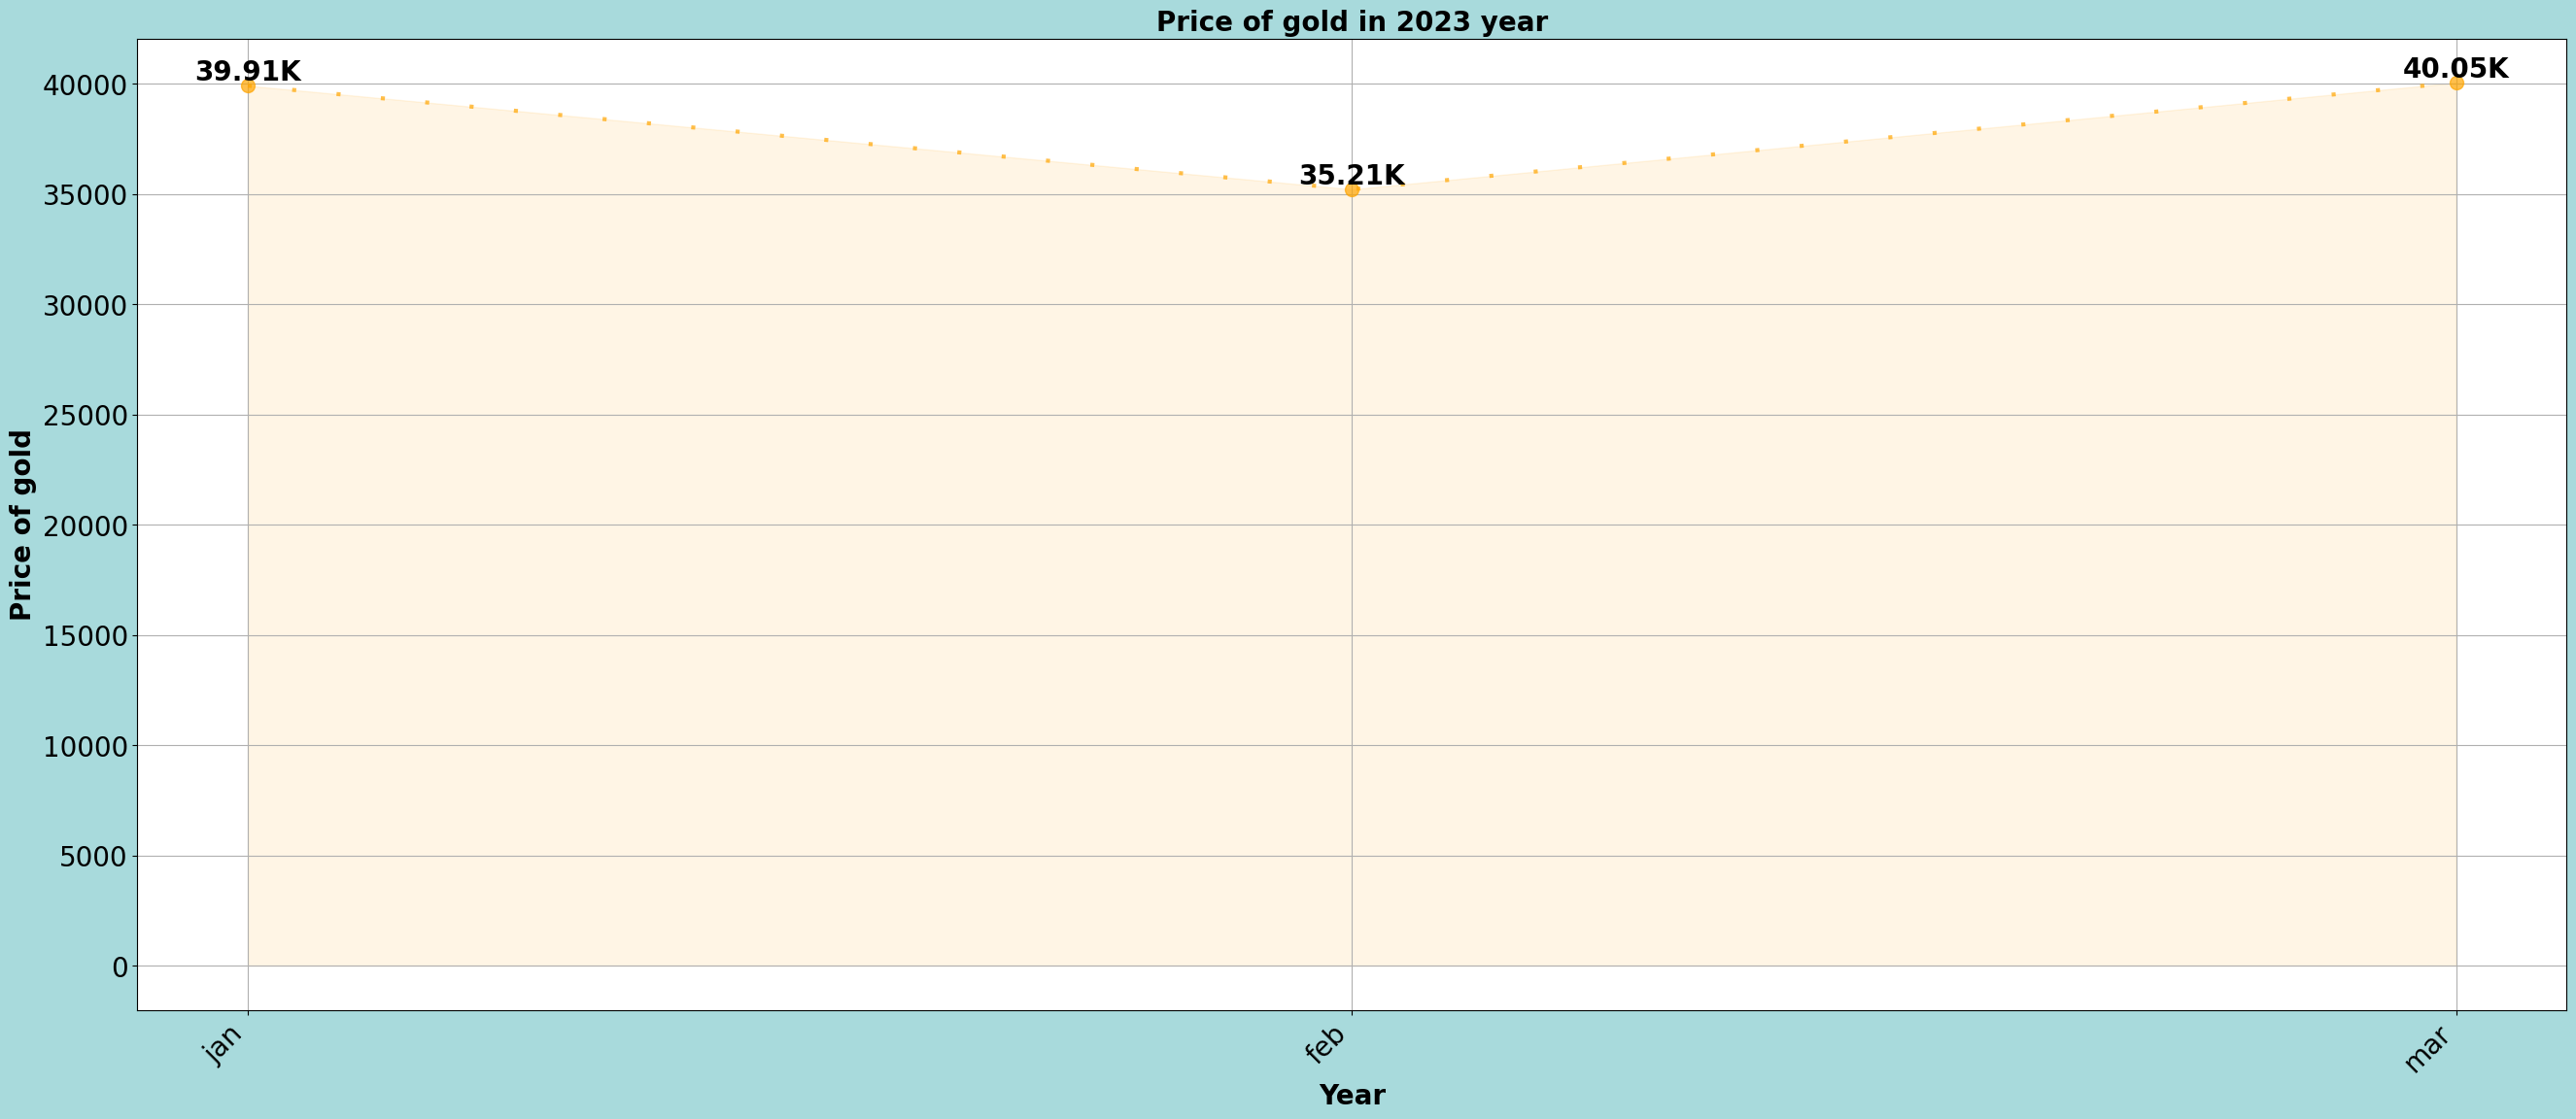

In [23]:
fig,ax1 = plt.subplots(figsize=(25, 10))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(df['Year'].tail(3),df['Price of gold in 2023 year'].tail(3),color='orange',linewidth=3,alpha=0.7,marker='o',markersize=10,linestyle=(0,(1,10)))

ax1.fill_between(df['Year'],df['Price of gold in 2023 year'],color='orange',alpha=0.1)
for i, temp in enumerate(df['Price of gold in 2023 year'].tail(3)):
    ax1.text(df['Year'][i], temp+1, str(round(temp/1000,2))+'K', ha='center', va='bottom', fontsize=20,fontweight="bold")


ax1.set_title('Price of gold in 2023 year',fontsize=20,fontweight='bold')
ax1.set_xlabel('Year', fontsize=20, fontweight='bold')
ax1.set_ylabel('Price of gold', fontsize=20, fontweight='bold')

ax1.set_xticks(df['Year'])
ax1.set_xticklabels(df['Year'], rotation=45, ha='right')
ax1.tick_params(axis='both',labelsize=20)
ax1.grid(True)

#ax1.set_xlim([-0.9,2022])
#ax1.set_ylim([0,10])
fig.patch.set_facecolor('#a8dadc')
plt.show()

# # > **creating bar plot**

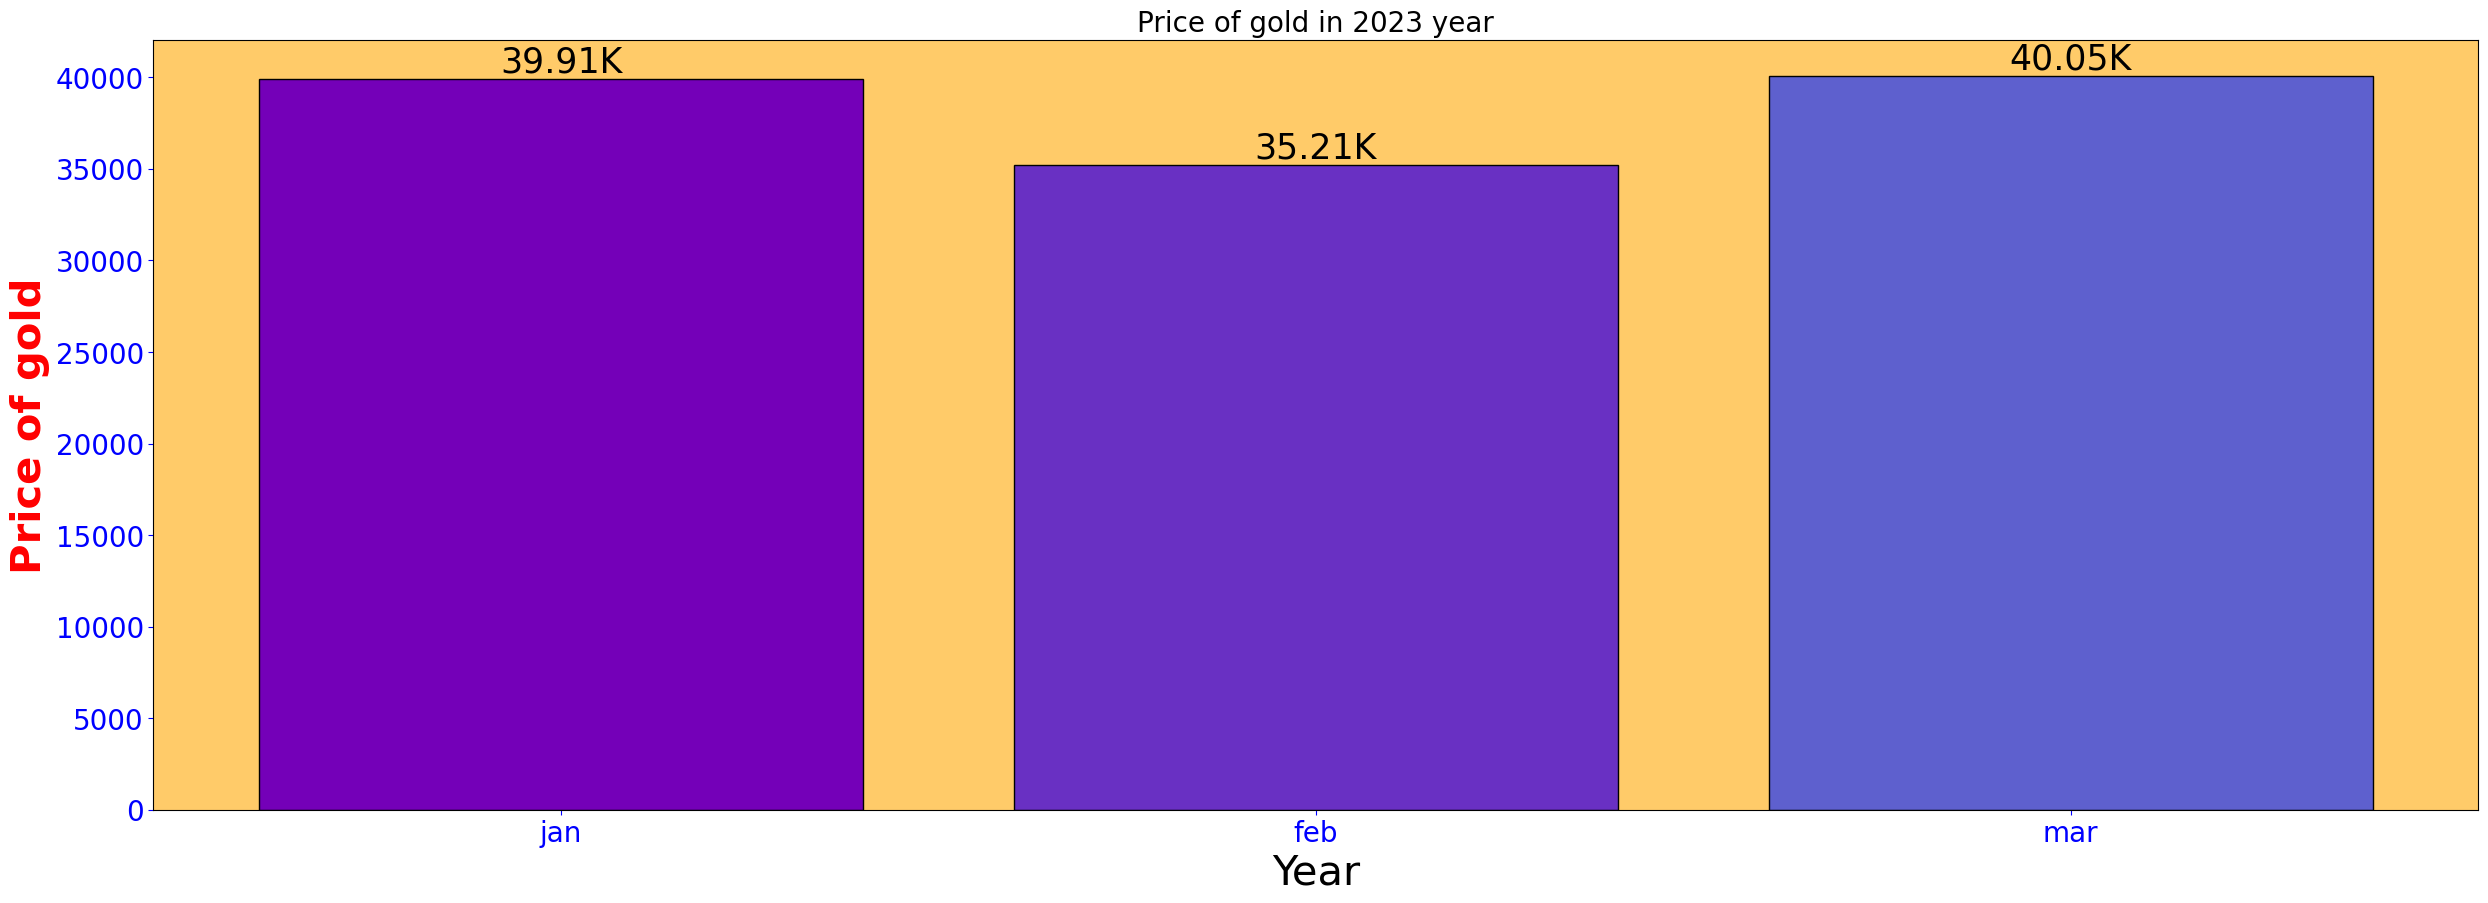

In [24]:
fig,(ax1)=plt.subplots(figsize=(30,10))
#labels and titles
#bar
color1 = ['#7400b8','#6930c3','#5e60ce']
bar1=ax1.bar(x=df['Year'],height=df['Price of gold in 2023 year'],color=color1,edgecolor='black')
for i,bar in enumerate(bar1):
  ax1.text(bar.get_x() + bar.get_width() / 2,bar.get_height() + 0.5,f"{round(df['Price of gold in 2023 year'].iloc[i]/1000,2)}K", ha="center",va = "bottom",fontsize=25)
ax1.set_title('Price of gold in 2023 year',fontsize=20)
ax1.set_ylabel('Price of gold',fontsize=30,fontweight='bold',color='red')
ax1.set_xlabel('Year',fontsize=30)
ax1.set_facecolor(color='#ffcb69')
ax1.tick_params(axis='x',labelsize='20',colors='Blue')
ax1.tick_params(axis='y',labelsize='20',colors='Blue')

In [25]:
df1 = pd.read_csv('/kaggle/input/daily-gold-price-2018-2023/Daily Gold Price - Sheet1.csv')

> creating bar plot and line chart of price of gold in every year

In [26]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Mar 29, 2023","1,966.10","1,966.10","1,966.10","1,966.10","1,966.10",21
1,"Mar 28, 2023","1,972.40","1,972.40","1,972.40","1,972.40","1,972.40",21
2,"Mar 27, 2023","1,957.20","1,957.20","1,952.40","1,952.40","1,952.40",877
3,"Mar 24, 2023","1,991.70","1,995.40","1,982.10","1,982.10","1,982.10",19
4,"Mar 23, 2023","1,990.50","1,994.60","1,990.50","1,993.80","1,993.80",33
...,...,...,...,...,...,...,...
1261,"Apr 06, 2018","1,326.50","1,333.00","1,319.00","1,331.90","1,331.90",348
1262,"Apr 05, 2018","1,333.50","1,333.70","1,322.60","1,324.30","1,324.30",258
1263,"Apr 04, 2018","1,331.80","1,347.30","1,331.60","1,335.80","1,335.80",718
1264,"Apr 03, 2018","1,340.40","1,341.50","1,328.50","1,332.80","1,332.80",702


In [27]:
df1.rename(columns={'Close': 'Price of gold in every year'}, inplace=True)#rename the colse column name into price of gold in 2019
df1

,Date,Open,High,Low,Price of gold in every year,Adj Close,Volume
0,"Mar 29, 2023","1,966.10","1,966.10","1,966.10","1,966.10","1,966.10",21
1,"Mar 28, 2023","1,972.40","1,972.40","1,972.40","1,972.40","1,972.40",21
2,"Mar 27, 2023","1,957.20","1,957.20","1,952.40","1,952.40","1,952.40",877
3,"Mar 24, 2023","1,991.70","1,995.40","1,982.10","1,982.10","1,982.10",19
4,"Mar 23, 2023","1,990.50","1,994.60","1,990.50","1,993.80","1,993.80",33
...,...,...,...,...,...,...,...
1261,"Apr 06, 2018","1,326.50","1,333.00","1,319.00","1,331.90","1,331.90",348
1262,"Apr 05, 2018","1,333.50","1,333.70","1,322.60","1,324.30","1,324.30",258
1263,"Apr 04, 2018","1,331.80","1,347.30","1,331.60","1,335.80","1,335.80",718
1264,"Apr 03, 2018","1,340.40","1,341.50","1,328.50","1,332.80","1,332.80",702


In [28]:
df1=df1.drop(['Open','High','Low','Adj Close','Volume'],axis=1)
df1

,Date,Price of gold in every year
0,"Mar 29, 2023","1,966.10"
1,"Mar 28, 2023","1,972.40"
2,"Mar 27, 2023","1,952.40"
3,"Mar 24, 2023","1,982.10"
4,"Mar 23, 2023","1,993.80"
...,...,...
1261,"Apr 06, 2018","1,331.90"
1262,"Apr 05, 2018","1,324.30"
1263,"Apr 04, 2018","1,335.80"
1264,"Apr 03, 2018","1,332.80"


In [29]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%b %d, %Y')
df1['Date'] = df1['Date'].dt.year

In [30]:
df1

,Date,Price of gold in every year
0,2023,"1,966.10"
1,2023,"1,972.40"
2,2023,"1,952.40"
3,2023,"1,982.10"
4,2023,"1,993.80"
...,...,...
1261,2018,"1,331.90"
1262,2018,"1,324.30"
1263,2018,"1,335.80"
1264,2018,"1,332.80"


In [31]:
df1.sort_values(['Date'],inplace=True)#sorting by year
df1['Price of gold in every year'] = pd.to_numeric(df1['Price of gold in every year'].str.replace(',', '').replace('-', '0'))#convert the value of price in numeric
df1 = df1.groupby(by='Date').sum().reset_index()#sum the same year price and reset the index

In [32]:
df1

,Date,Price of gold in every year
0,2018,237206.3
1,2019,350966.0
2,2020,448610.5
3,2021,454804.0
4,2022,451817.1
5,2023,115169.4


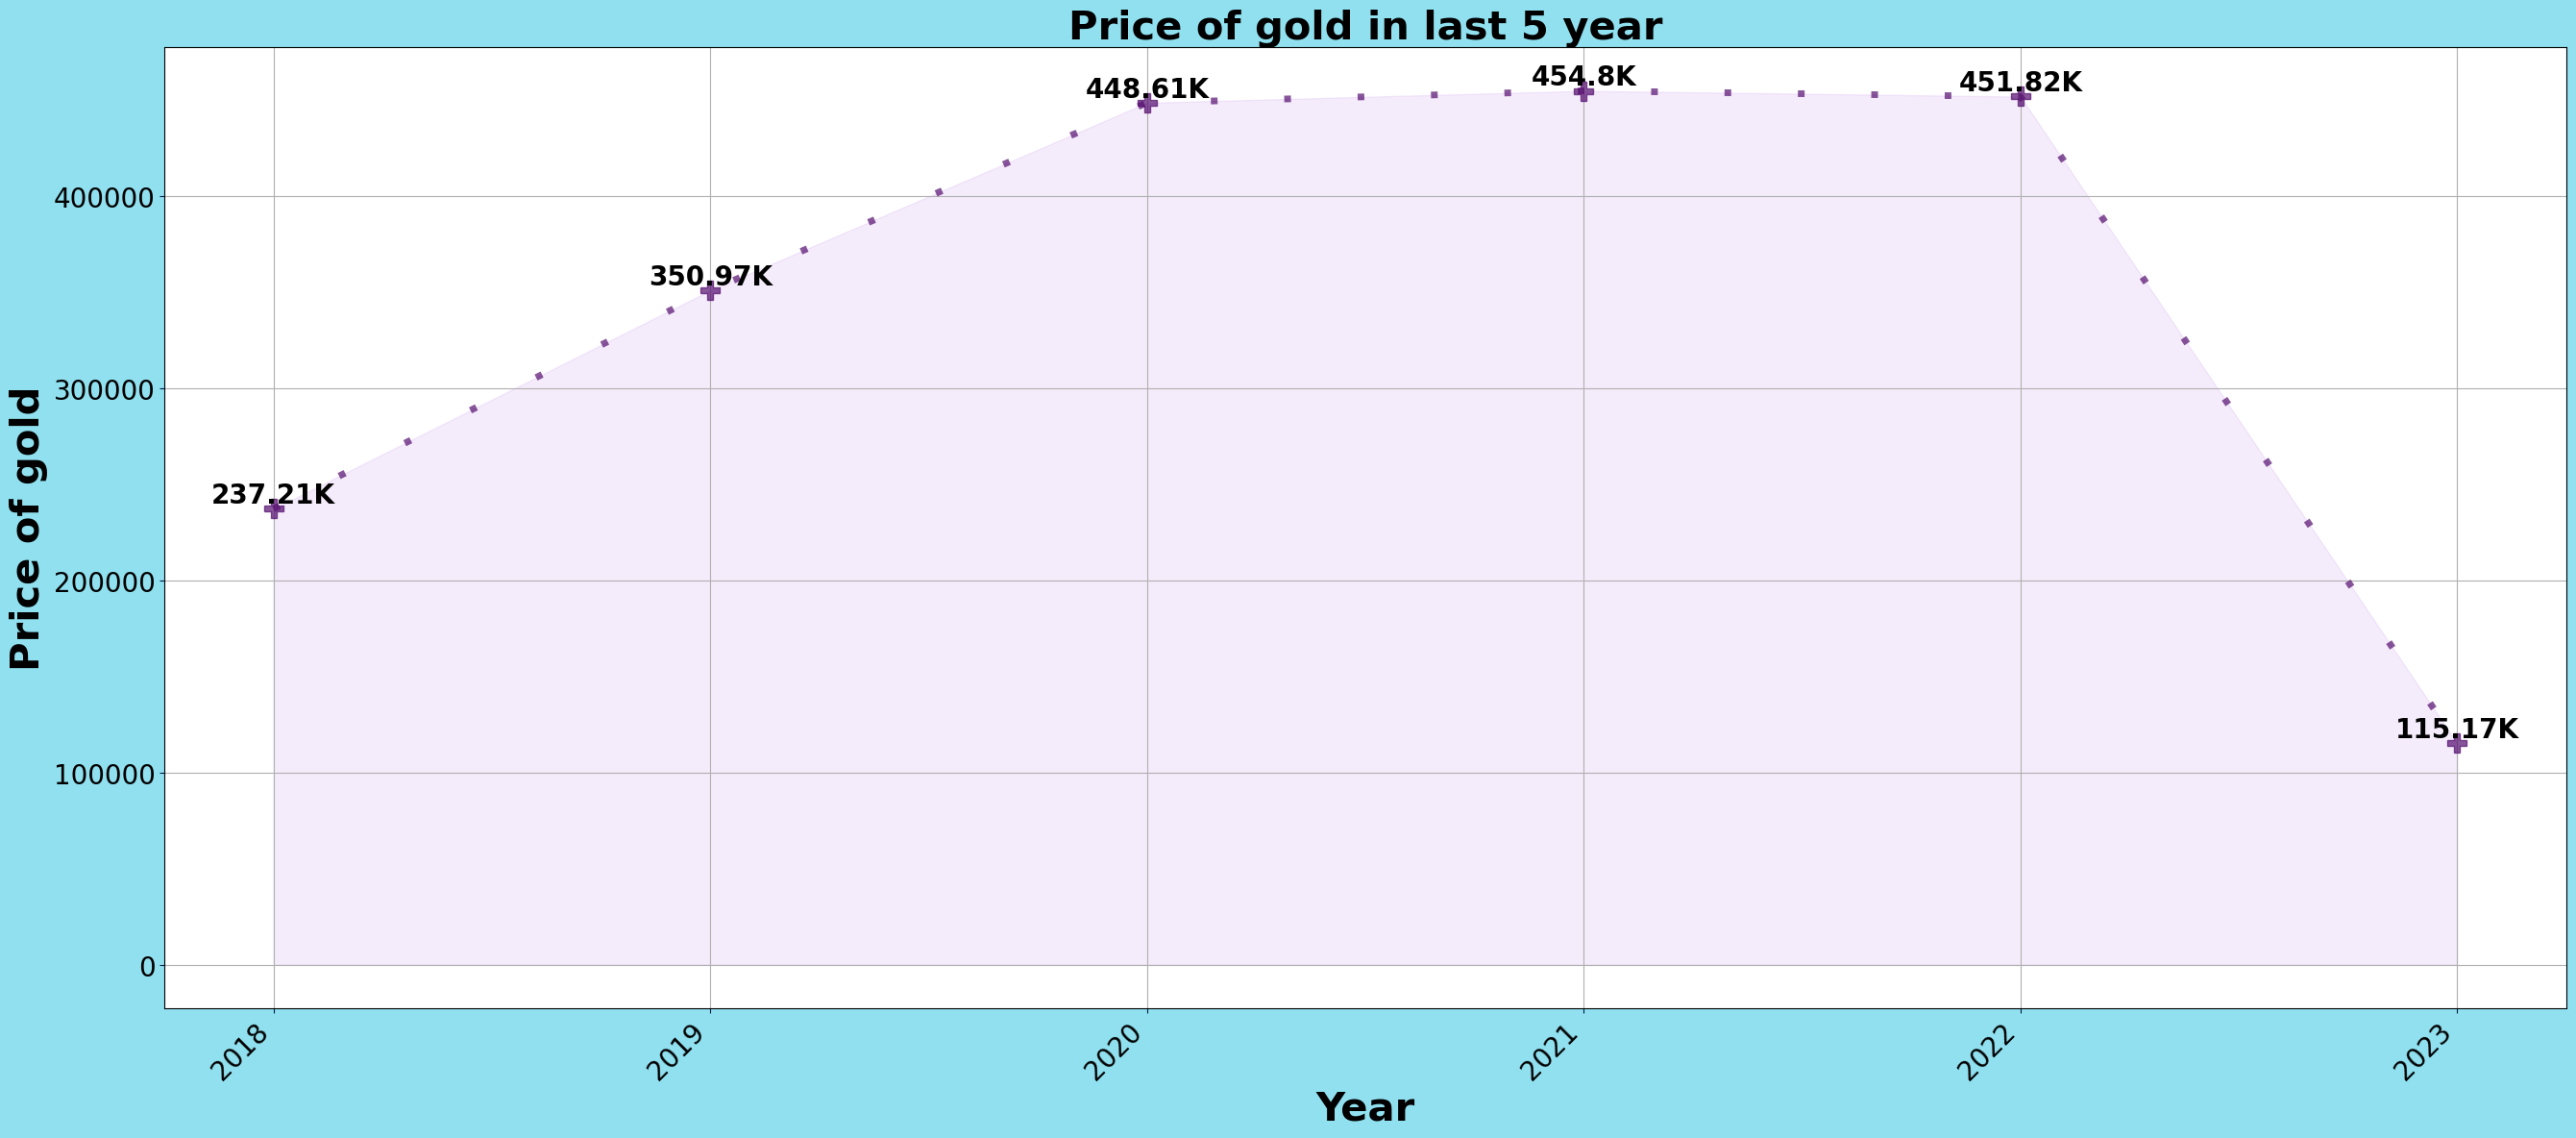

In [33]:
df1.rename(columns={'Date': 'Year'}, inplace=True)
fig,ax1 = plt.subplots(figsize=(25, 10))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(df1['Year'].tail(6),df1['Price of gold in every year'].tail(6),color='#540d6e',linewidth=5,alpha=0.7,marker='P',markersize=15,linestyle=(0,(1,10)))

ax1.fill_between(df1['Year'],df1['Price of gold in every year'],color='#9d4edd',alpha=0.1)
for i, temp in enumerate(df1['Price of gold in every year'].tail(6)):
    ax1.text(df1['Year'][i], temp+1, str(round(temp/1000,2))+'K', ha='center', va='bottom', fontsize=20,fontweight="bold")


ax1.set_title('Price of gold in last 5 year',fontsize=30,fontweight='bold')
ax1.set_xlabel('Year', fontsize=30, fontweight='bold')
ax1.set_ylabel('Price of gold', fontsize=30, fontweight='bold')

ax1.set_xticks(df1['Year'])
ax1.set_xticklabels(df1['Year'], rotation=45, ha='right')
ax1.tick_params(axis='both',labelsize=20,color='#001d4a')
ax1.grid(True)


fig.patch.set_facecolor('#90e0ef')
plt.show()

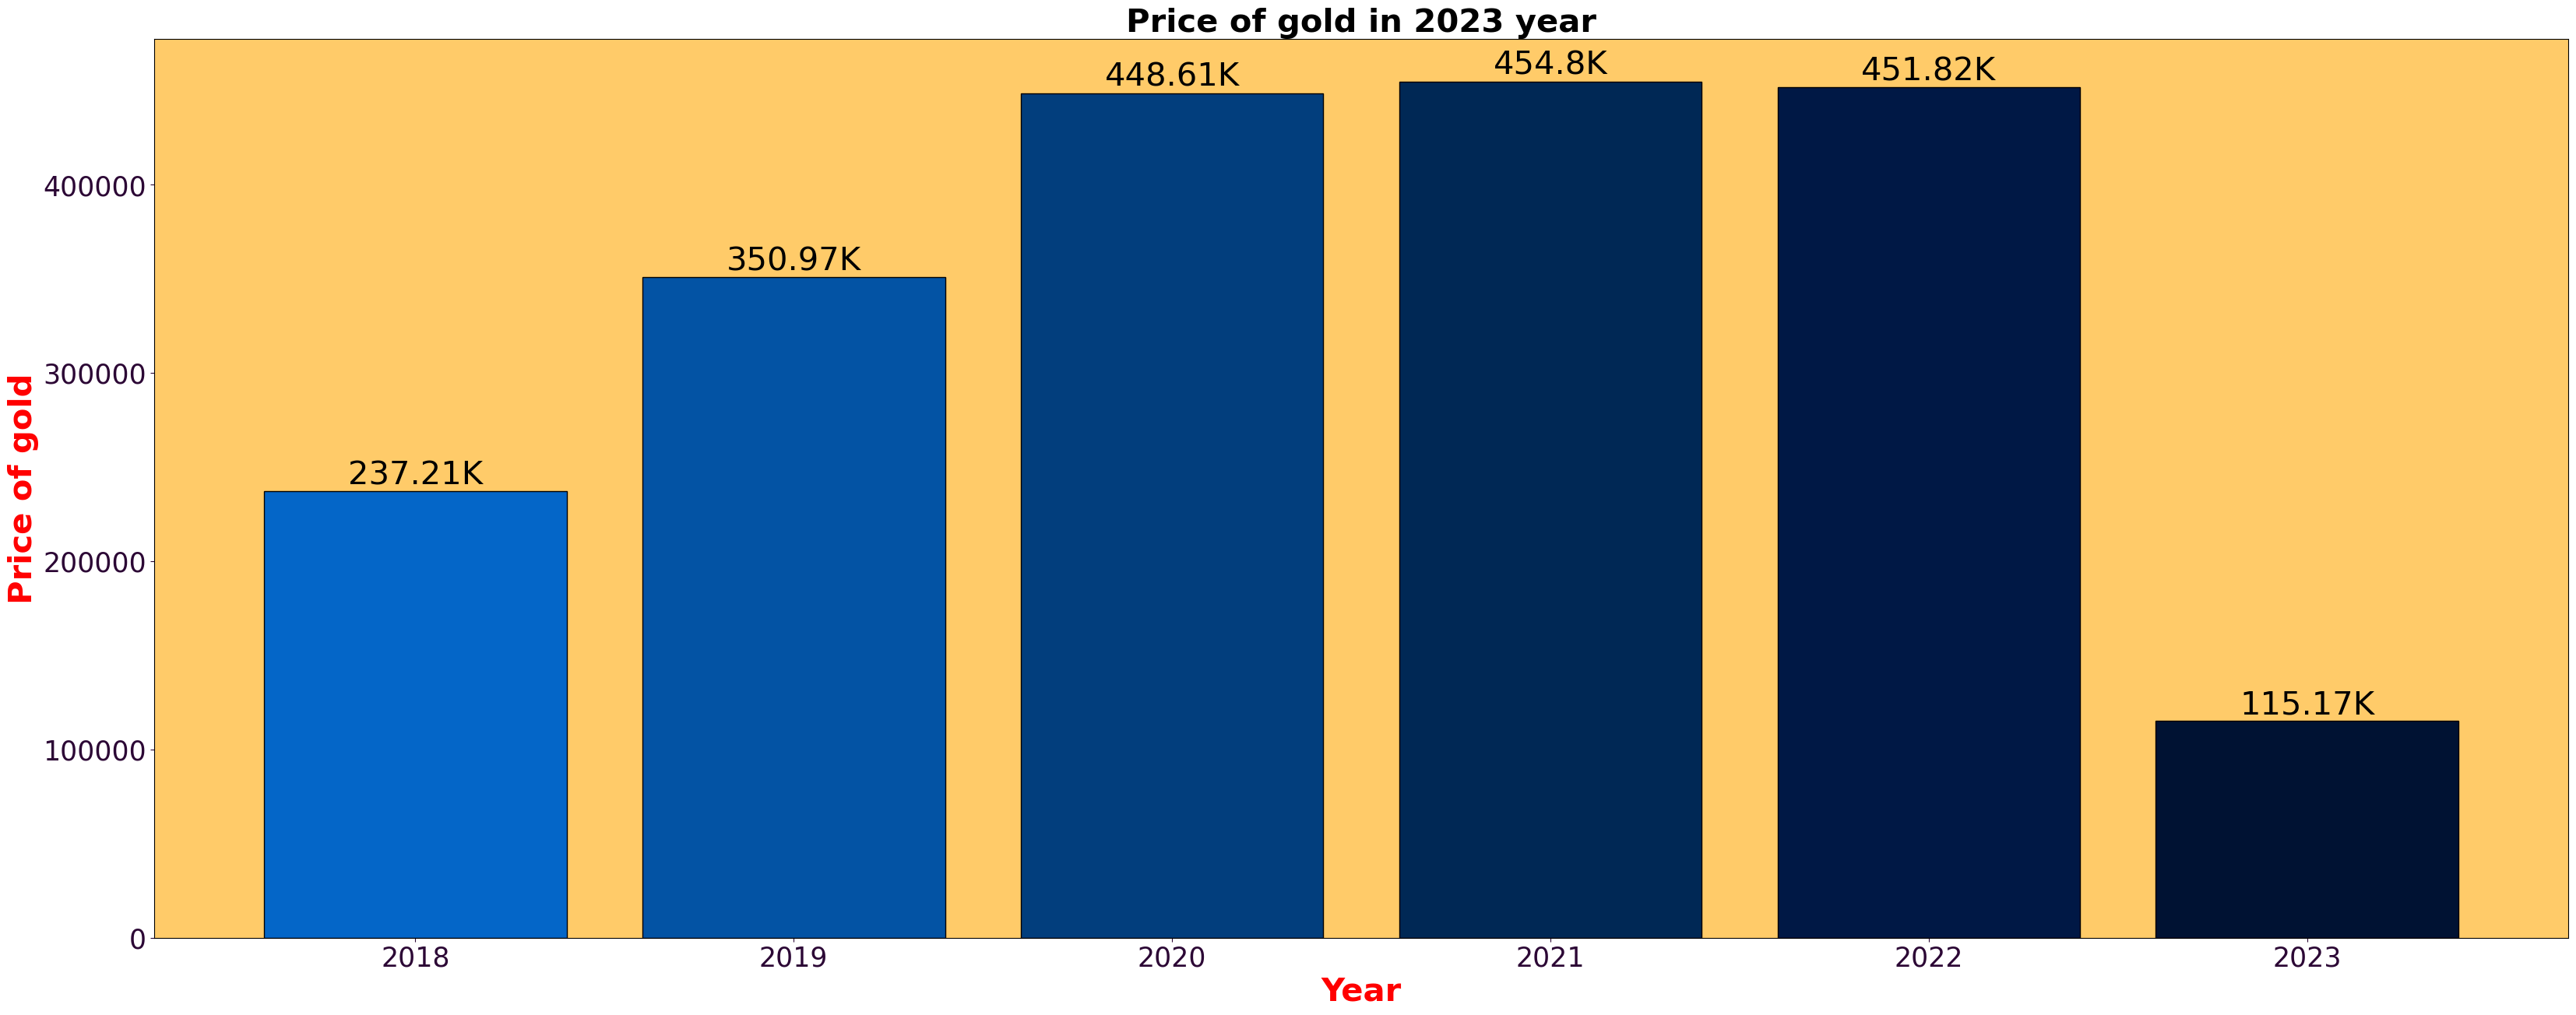

In [34]:
fig,(ax1)=plt.subplots(figsize=(40,15))
#labels and titles
#bar
color1 = ['#0466c8','#0353a4','#023e7d','#002855','#001845','#001233']
bar1=ax1.bar(x=df1['Year'],height=df1['Price of gold in every year'],color=color1,edgecolor='black')
for i,bar in enumerate(bar1):
  ax1.text(bar.get_x() + bar.get_width() / 2,bar.get_height() + 0.5,f"{round(df1['Price of gold in every year'].iloc[i]/1000,2)}K", ha="center",va = "bottom",fontsize=30)
ax1.set_title('Price of gold in 2023 year',fontsize=30,fontweight='bold')
ax1.set_ylabel('Price of gold',fontsize=30,fontweight='bold',color='red')
ax1.set_xlabel('Year',fontsize=30,fontweight='bold',color='red')
ax1.set_facecolor(color='#ffcb69')
ax1.tick_params(axis='x',labelsize='25',colors='#2c0735')
ax1.tick_params(axis='y',labelsize='25',colors='#2c0735')